In [1]:
#importing libraries 

import numpy as np
import pandas as pd
from sklearn.svm import SVR
from xgboost import XGBRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [2]:
#loading all three wells

training_data = pd.read_csv('1S-1X log.csv')
training_data

,DEPTH,CALI,GR,ILD,ITT,LLD,LLS,MSFL,NPHI,RHOB,SFL,SP
0,91.4400,-999.2500,17.0387,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.2500,-999.25,-999.2500
1,91.5924,-999.2500,16.6233,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.2500,-999.25,-999.2500
2,91.7448,-999.2500,16.0359,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.2500,-999.25,-999.2500
3,91.8972,-999.2500,15.2310,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.2500,-999.25,-999.2500
4,92.0496,-999.2500,14.9397,-999.25,-999.25,-999.25,-999.25,-999.25,-999.2500,-999.2500,-999.25,-999.2500
...,...,...,...,...,...,...,...,...,...,...,...,...
23330,3646.9320,8.7959,120.8450,-999.25,-999.25,-999.25,-999.25,-999.25,0.2351,2.5498,-999.25,13.7028
23331,3647.0844,8.5674,120.2273,-999.25,-999.25,-999.25,-999.25,-999.25,0.2411,2.5665,-999.25,13.4578
23332,3647.2368,8.4531,116.5244,-999.25,-999.25,-999.25,-999.25,-999.25,0.2475,2.5728,-999.25,9.9158
23333,3647.3892,8.4739,-999.2500,-999.25,-999.25,-999.25,-999.25,-999.25,0.2509,2.5595,-999.25,-999.2500


In [3]:
#Removing negatives
training_data = training_data[(training_data >= 0).all(axis=1)]
display(training_data)

,DEPTH,CALI,GR,ILD,ITT,LLD,LLS,MSFL,NPHI,RHOB,SFL,SP
9400,1524.0000,14.4538,54.8415,0.9607,0.1233,0.9879,1.0776,1.4853,0.4397,2.2471,1.2134,39.9174
9401,1524.1524,14.0887,55.8918,0.9660,0.1231,0.9906,1.0821,1.5206,0.4255,2.2587,1.1890,39.9393
9402,1524.3048,13.8190,57.2492,0.9624,0.1238,0.9823,1.0876,1.4323,0.4351,2.2589,1.1610,39.3027
9403,1524.4572,13.7363,58.0199,0.9399,0.1252,0.9660,1.0079,1.3148,0.4469,2.2546,1.1243,38.6237
9404,1524.6096,13.8716,58.2939,0.9146,0.1256,0.9360,1.0188,1.2740,0.4353,2.2515,1.0922,38.2129
...,...,...,...,...,...,...,...,...,...,...,...,...
23252,3635.0448,9.3138,115.5579,2.1824,0.0854,2.1704,2.5690,3.1694,0.2417,2.5226,2.6407,11.5939
23253,3635.1972,9.1831,115.3115,2.2141,0.0859,2.1827,2.5769,2.8899,0.2614,2.4981,2.6294,10.5358
23254,3635.3496,8.9994,114.8351,2.2159,0.0865,2.1733,2.5695,1.2580,0.2754,2.5023,2.6371,10.2207
23255,3635.5020,8.9888,115.0071,2.1779,0.0863,2.1579,2.5616,0.7530,0.2617,2.5252,2.6507,10.0463


In [4]:
#selecting features
high_corr_features = ['DEPTH','CALI', 'GR', 'ITT', 'NPHI']
target = 'RHOB'

#SORTING
X= training_data[high_corr_features]
Y = training_data[target]


In [5]:
#spliting
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3, random_state=42)

## ANN

In [6]:
#Scaling
scaler= StandardScaler()
X_train_scaled = scaler. fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Training the ANN model
model= MLPRegressor(hidden_layer_sizes=(100,100), activation='relu',random_state=42)
model.fit(X_train_scaled, Y_train)



MLPRegressor(hidden_layer_sizes=(100, 100), random_state=42)

In [7]:
#make predictions
ANN_Y_pred= model.predict(X_test_scaled)


#calculate the R_square value

ANN_r2 =r2_score(Y_test, ANN_Y_pred)
ANN_mse=mean_squared_error(Y_test, ANN_Y_pred)
ANN_rmse = np.sqrt(ANN_mse)



## EXTREME GRADIENT BOOSTER

In [8]:
# XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, Y_train)

# Predicting log data using XGBoost
xgb_predictions = xgb_model.predict(X_test)

# Evaluating the performance of XGBoost
xgb_r2 =r2_score(Y_test, xgb_predictions)
xgb_mse=mean_squared_error(Y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)

## LINEAR REGRESSION MODEL

In [9]:
# Step 3: Train the SVM model
linearReg_model = LinearRegression()# You can choose other kernels like 'rbf', 'poly', etc., depending on your data
linearReg_model.fit(X_train, Y_train)
# Step 4: Evaluate the model
linearReg_predictions = linearReg_model.predict(X_test)
# Evaluating the performance of XGBoost
linearReg_r2 =r2_score(Y_test, linearReg_predictions)
linearReg_mse=mean_squared_error(Y_test, linearReg_predictions)
linearReg_rmse = np.sqrt(linearReg_mse)

## RF

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
#Generating a model
reg = RandomForestRegressor()

#fit data into the regression model
reg.fit(X_train, Y_train)

#Creating a prediction statement
rf_predictions = reg.predict(X_test)

#root mean sq. error
rf_r2 =r2_score(Y_test, rf_predictions)
rf_mse=mean_squared_error(Y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)

## Error Visualization

In [12]:
data = {
    'Mean Square Error': [rf_mse, xgb_mse, ANN_mse, linearReg_mse],
    'Root Mean Square Error': [rf_rmse, xgb_rmse, ANN_rmse, linearReg_rmse],
    'R square Error': [rf_r2, xgb_r2, ANN_r2, linearReg_r2]
}
error = pd.DataFrame(data, index = ['Random Forest Regressor',
                                    'Extreme Gradient Booster',
                                    'Artificial Neural Network',
                                    'Linear Regression'])
error

,Mean Square Error,Root Mean Square Error,R square Error
Random Forest Regressor,0.001437,0.037912,0.898717
Extreme Gradient Booster,0.001379,0.037133,0.902836
Artificial Neural Network,0.003629,0.060241,0.744280
Linear Regression,0.004566,0.067569,0.678288


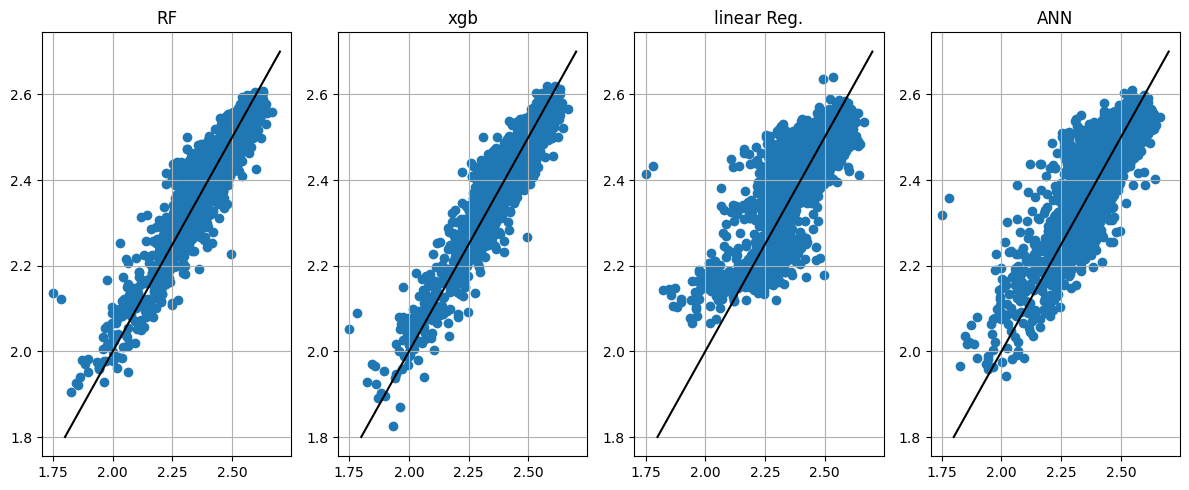

In [13]:
fig, (err1, err2, err3, err4) = plt.subplots(1,  4, figsize = (12, 5))

#first plot
err1.scatter(Y_test, rf_predictions)
err1.plot((1.8, 2.7), (1.8, 2.7), 'black')
err1.grid(True)
err1.set_title('RF')

#2nd plot
err2.scatter(Y_test, xgb_predictions)
err2.grid(True)
err2.plot((1.8, 2.7), (1.8, 2.7), 'black')
err2.set_title('xgb')

#3rd plot
err3.scatter(Y_test, linearReg_predictions)
err3.grid(True)
err3.plot((1.8, 2.7), (1.8, 2.7), 'black')
err3.set_title('linear Reg.')

#4th plot
X_test_scaled = scaler.transform(X_test)
ann_predictions = model.predict(X_test_scaled)

err4.scatter(Y_test, ann_predictions)
err4.grid(True)
err4.plot((1.8, 2.7), (1.8, 2.7), 'black')
err4.set_title('ANN')

#display the figure
plt.tight_layout()
plt.show()


## BLIND WELLS

In [14]:
test_1 = pd.read_csv('1S-2X log.csv')
test_2 = pd.read_csv('1S-3X log.csv')
test_3 = pd.read_csv('1S-4X log.csv')

#Removing negatives
test_1 = test_1[(test_1 >= 0).all(axis=1)]
test_2 = test_2[(test_2 >= 0).all(axis=1)]
test_3 = test_3[(test_3 >= -115).all(axis=1)]

# Excluding target from testing file
test_1_noTarget = test_1[high_corr_features]
test_2_noTarget = test_2[high_corr_features]
test_3_noTarget = test_3[high_corr_features]

## 1S-2X

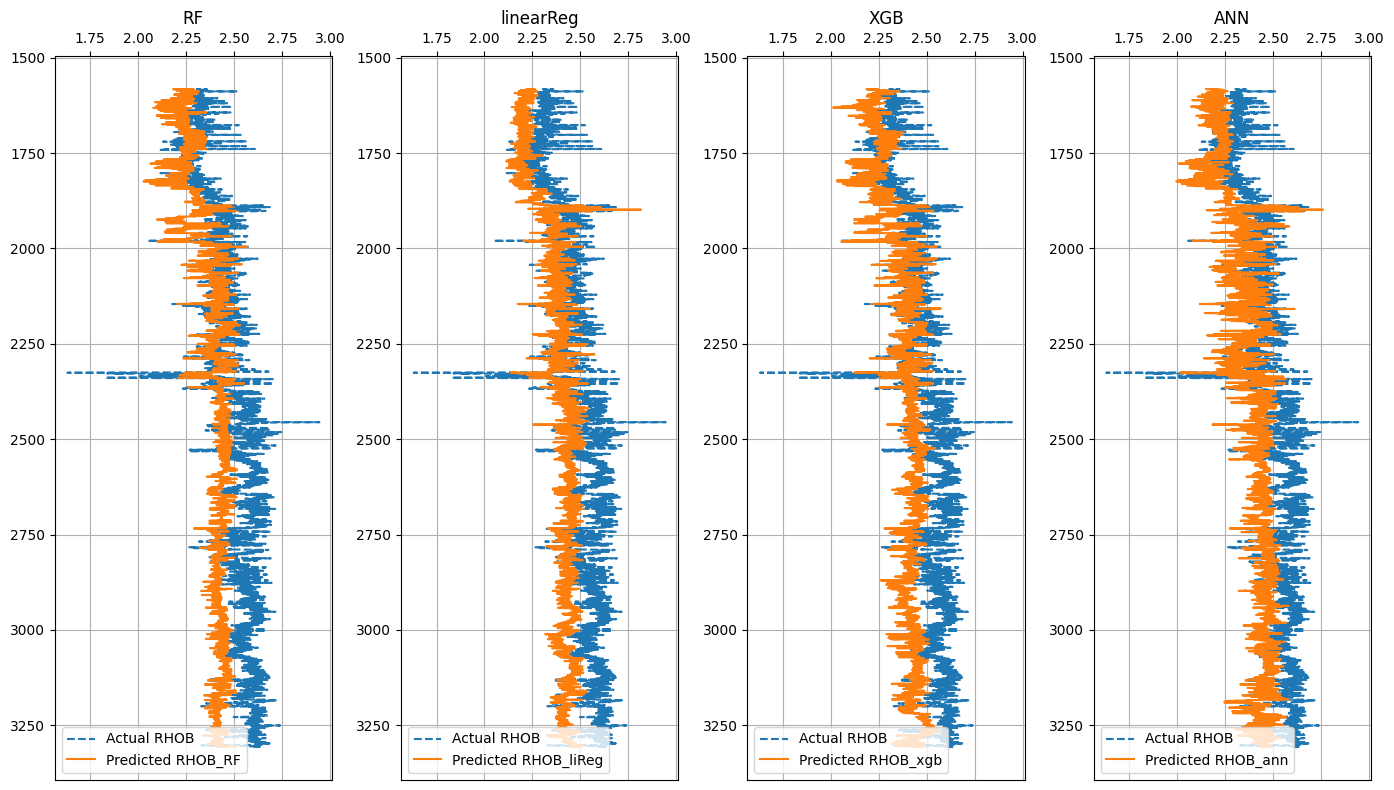

In [15]:
#random forest
test_1['Predicted_RHOB_RF'] = reg.predict(test_1_noTarget)

#extreme gradient booster 
test_1['Predicted_RHOB_xgb'] = xgb_model.predict(test_1_noTarget)
#ANN
test_1['Predicted_RHOB_ANN'] = model.predict(scaler.transform(test_1_noTarget))

#ANN
test_1['Predicted_RHOB_liReg'] = linearReg_model.predict(test_1_noTarget)

#creating a figure with three subplots
fig, (tst11, tst12, tst13, tst14) = plt.subplots(1, 4, figsize =(14, 8))

#random forest
tst11.plot(test_1['RHOB'],test_1['DEPTH'],'--', label = 'Actual RHOB')
tst11.plot(test_1['Predicted_RHOB_RF'], test_1_noTarget['DEPTH'], label = 'Predicted RHOB_RF')
tst11.grid(True)
tst11.legend()
tst11.xaxis.set_ticks_position('top')
tst11.xaxis.set_label_position('top')
tst11.invert_yaxis()
tst11.set_title('RF')

#linear Regression
tst12.plot(test_1['RHOB'],test_1['DEPTH'],'--', label = 'Actual RHOB')
tst12.plot(test_1['Predicted_RHOB_liReg'], test_1_noTarget['DEPTH'], label = 'Predicted RHOB_liReg')
tst12.grid(True)
tst12.legend()
tst12.xaxis.set_ticks_position('top')
tst12.xaxis.set_label_position('top')
tst12.invert_yaxis()
tst12.set_title('linearReg')

#extreme gradient booster 
tst13.plot(test_1['RHOB'],test_1['DEPTH'],'--', label = 'Actual RHOB')
tst13.plot(test_1['Predicted_RHOB_xgb'], test_1_noTarget['DEPTH'], label = 'Predicted RHOB_xgb')
tst13.grid(True)
tst13.legend()
tst13.xaxis.set_ticks_position('top')
tst13.xaxis.set_label_position('top')
tst13.invert_yaxis()
tst13.set_title('XGB')

#ANN
tst14.plot(test_1['RHOB'],test_1['DEPTH'],'--', label = 'Actual RHOB')
tst14.plot(test_1['Predicted_RHOB_ANN'], test_1_noTarget['DEPTH'], label = 'Predicted RHOB_ann')
tst14.grid(True)
tst14.legend()
tst14.xaxis.set_ticks_position('top')
tst14.xaxis.set_label_position('top')
tst14.invert_yaxis()
tst14.set_title('ANN')

#display the figure
plt.tight_layout()
plt.show()

,Mean Square Error,Root Mean Square Error,R square Error
Random Forest Regressor,0.017745,0.133212,-0.137754
Extreme Gradient Booster,0.017915,0.133845,-0.148596
Artificial Neural Network,0.017732,0.133163,-0.136919
linear Regression,0.016604,0.128857,-0.064569


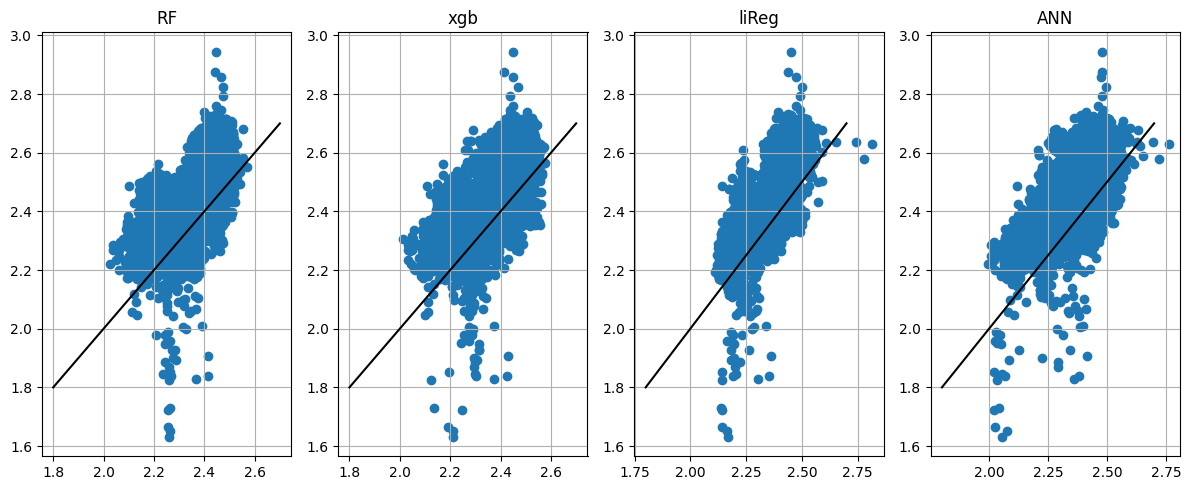

In [16]:
#root mean sq. error
lhs = test_1['RHOB']

#rf
rf_rhs = test_1['Predicted_RHOB_RF']

rf_r2 =r2_score(lhs, rf_rhs)
rf_mse=mean_squared_error(lhs, rf_rhs)
rf_rmse = np.sqrt(rf_mse)

#ANN
ann_rhs = test_1['Predicted_RHOB_ANN']

ann_r2 =r2_score(lhs, ann_rhs)
ann_mse=mean_squared_error(lhs, ann_rhs)
ann_rmse = np.sqrt(ann_mse)

#xgb
xgb_rhs = test_1['Predicted_RHOB_xgb']

xgb_r2 =r2_score(lhs, xgb_rhs)
xgb_mse=mean_squared_error(lhs, xgb_rhs)
xgb_rmse = np.sqrt(xgb_mse)

#liReg
liReg_rhs = test_1['Predicted_RHOB_liReg']

liReg_r2 =r2_score(lhs, liReg_rhs)
liReg_mse=mean_squared_error(lhs, liReg_rhs)
liReg_rmse = np.sqrt(liReg_mse)

test_1_data = {
    'Mean Square Error': [rf_mse, xgb_mse, ann_mse, liReg_mse],
    'Root Mean Square Error': [rf_rmse, xgb_rmse, ann_rmse, liReg_rmse],
    'R square Error': [rf_r2, xgb_r2, ann_r2, liReg_r2]
}
test_1_error = pd.DataFrame(test_1_data, index = ['Random Forest Regressor',
                                    'Extreme Gradient Booster',
                                    'Artificial Neural Network',
                                    'linear Regression'])
display(test_1_error)

fig, (err1, err2, err3, err4) = plt.subplots(1, 4, figsize = (12, 5))

#first plot
err1.scatter(rf_rhs, lhs)
err1.plot((1.8, 2.7), (1.8, 2.7), 'black')
err1.grid(True)
err1.set_title('RF')

#2nd plot
err2.scatter(xgb_rhs, lhs)
err2.grid(True)
err2.plot((1.8, 2.7), (1.8, 2.7), 'black')
err2.set_title('xgb')

#3rd plot
err3.scatter(liReg_rhs, lhs)
err3.grid(True)
err3.plot((1.8, 2.7), (1.8, 2.7), 'black')
err3.set_title('liReg')

#4th plot
err4.scatter(ann_rhs, lhs)
err4.grid(True)
err4.plot((1.8, 2.7), (1.8, 2.7), 'black')
err4.set_title('ANN')

#display the figure
plt.tight_layout()
plt.show()


## 1S-3X

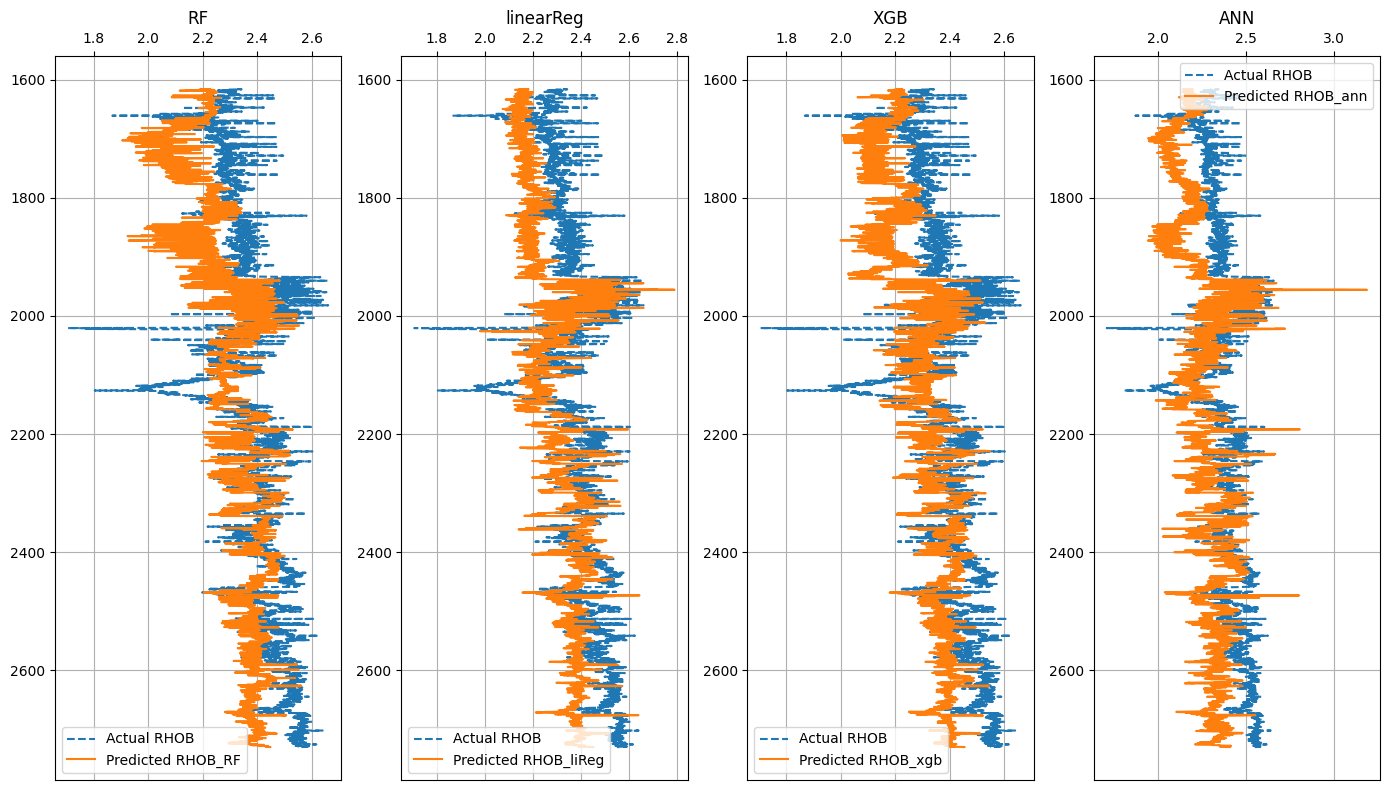

In [17]:
#random forest
test_2['Predicted_RHOB_RF'] = reg.predict(test_2_noTarget)

#extreme gradient booster 
test_2['Predicted_RHOB_xgb'] = xgb_model.predict(test_2_noTarget)
#ANN
test_2['Predicted_RHOB_ANN'] = model.predict(scaler.transform(test_2_noTarget))

#liReg
test_2['Predicted_RHOB_liReg'] = linearReg_model.predict(test_2_noTarget)

#creating a figure with three subplots
fig, (tst21, tst22, tst23, tst24) = plt.subplots(1, 4, figsize =(14, 8))

#random forest
tst21.plot(test_2['RHOB'],test_2['DEPTH'],'--', label = 'Actual RHOB')
tst21.plot(test_2['Predicted_RHOB_RF'], test_2_noTarget['DEPTH'], label = 'Predicted RHOB_RF')
tst21.grid(True)
tst21.legend()
tst21.xaxis.set_ticks_position('top')
tst21.xaxis.set_label_position('top')
tst21.invert_yaxis()
tst21.set_title('RF')

#linear Regression
tst22.plot(test_2['RHOB'],test_2['DEPTH'],'--', label = 'Actual RHOB')
tst22.plot(test_2['Predicted_RHOB_liReg'], test_2_noTarget['DEPTH'], label = 'Predicted RHOB_liReg')
tst22.grid(True)
tst22.legend()
tst22.xaxis.set_ticks_position('top')
tst22.xaxis.set_label_position('top')
tst22.invert_yaxis()
tst22.set_title('linearReg')

#extreme gradient booster 
tst23.plot(test_2['RHOB'],test_2['DEPTH'],'--', label = 'Actual RHOB')
tst23.plot(test_2['Predicted_RHOB_xgb'], test_2_noTarget['DEPTH'], label = 'Predicted RHOB_xgb')
tst23.grid(True)
tst23.legend()
tst23.xaxis.set_ticks_position('top')
tst23.xaxis.set_label_position('top')
tst23.invert_yaxis()
tst23.set_title('XGB')

#ANN
tst24.plot(test_2['RHOB'],test_2['DEPTH'],'--', label = 'Actual RHOB')
tst24.plot(test_2['Predicted_RHOB_ANN'], test_2_noTarget['DEPTH'], label = 'Predicted RHOB_ann')
tst24.grid(True)
tst24.legend()
tst24.xaxis.set_ticks_position('top')
tst24.xaxis.set_label_position('top')
tst24.invert_yaxis()
tst24.set_title('ANN')

#display the figure
plt.tight_layout()
plt.show()

,Mean Square Error,Root Mean Square Error,R square Error
Random Forest Regressor,0.020514,0.143226,-0.436994
Extreme Gradient Booster,0.019782,0.140647,-0.385711
Artificial Neural Network,0.032299,0.179718,-1.262525
linear Regression,0.018768,0.136995,-0.314673


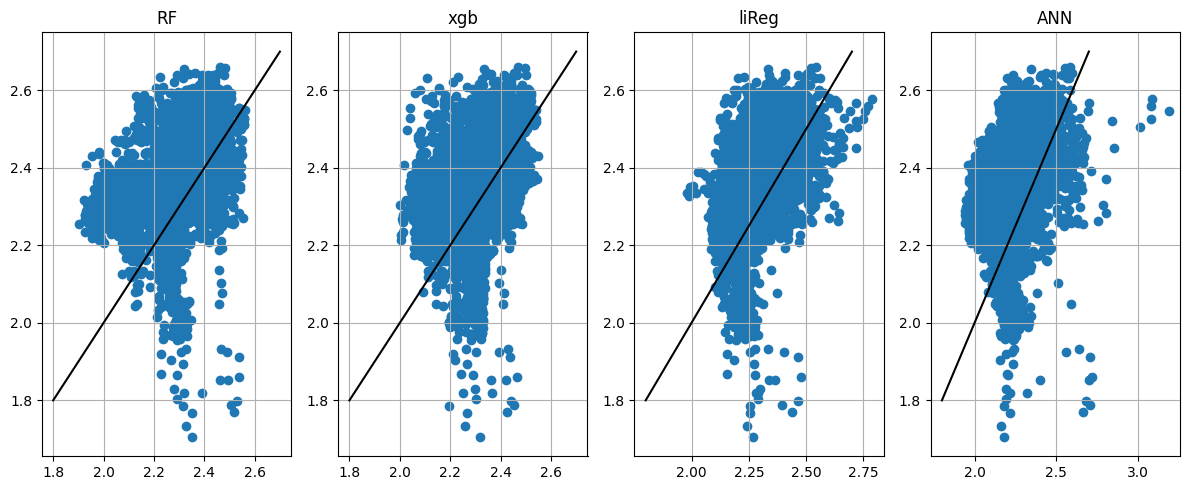

In [18]:
#root mean sq. error
lhs = test_2['RHOB']

#rf
rf_rhs = test_2['Predicted_RHOB_RF']

rf_r2 =r2_score(lhs, rf_rhs)
rf_mse=mean_squared_error(lhs, rf_rhs)
rf_rmse = np.sqrt(rf_mse)

#ANN
ann_rhs = test_2['Predicted_RHOB_ANN']

ann_r2 =r2_score(lhs, ann_rhs)
ann_mse=mean_squared_error(lhs, ann_rhs)
ann_rmse = np.sqrt(ann_mse)

#liReg
liReg_rhs = test_2['Predicted_RHOB_liReg']

liReg_r2 =r2_score(lhs, liReg_rhs)
liReg_mse=mean_squared_error(lhs, liReg_rhs)
liReg_rmse = np.sqrt(liReg_mse)

#xgb
xgb_rhs = test_2['Predicted_RHOB_xgb']

xgb_r2 =r2_score(lhs, xgb_rhs)
xgb_mse=mean_squared_error(lhs, xgb_rhs)
xgb_rmse = np.sqrt(xgb_mse)

test_2_data = {
    'Mean Square Error': [rf_mse, xgb_mse, ann_mse, liReg_mse],
    'Root Mean Square Error': [rf_rmse, xgb_rmse, ann_rmse, liReg_rmse],
    'R square Error': [rf_r2, xgb_r2, ann_r2, liReg_r2]
}
test_2_error = pd.DataFrame(test_2_data, index = ['Random Forest Regressor',
                                    'Extreme Gradient Booster',
                                    'Artificial Neural Network',
                                    'linear Regression'])
display(test_2_error)

fig, (err1, err2, err3, err4) = plt.subplots(1, 4, figsize = (12, 5))

#first plot
err1.scatter(rf_rhs, lhs)
err1.plot((1.8, 2.7), (1.8, 2.7), 'black')
err1.grid(True)
err1.set_title('RF')

#2nd plot
err2.scatter(xgb_rhs, lhs)
err2.grid(True)
err2.plot((1.8, 2.7), (1.8, 2.7), 'black')
err2.set_title('xgb')

#2rd plot
err3.scatter(liReg_rhs, lhs)
err3.grid(True)
err3.plot((1.8, 2.7), (1.8, 2.7), 'black')
err3.set_title('liReg')

#4th plot
err4.scatter(ann_rhs, lhs)
err4.grid(True)
err4.plot((1.8, 2.7), (1.8, 2.7), 'black')
err4.set_title('ANN')

#display the figure
plt.tight_layout()
plt.show()


## 1S-4X

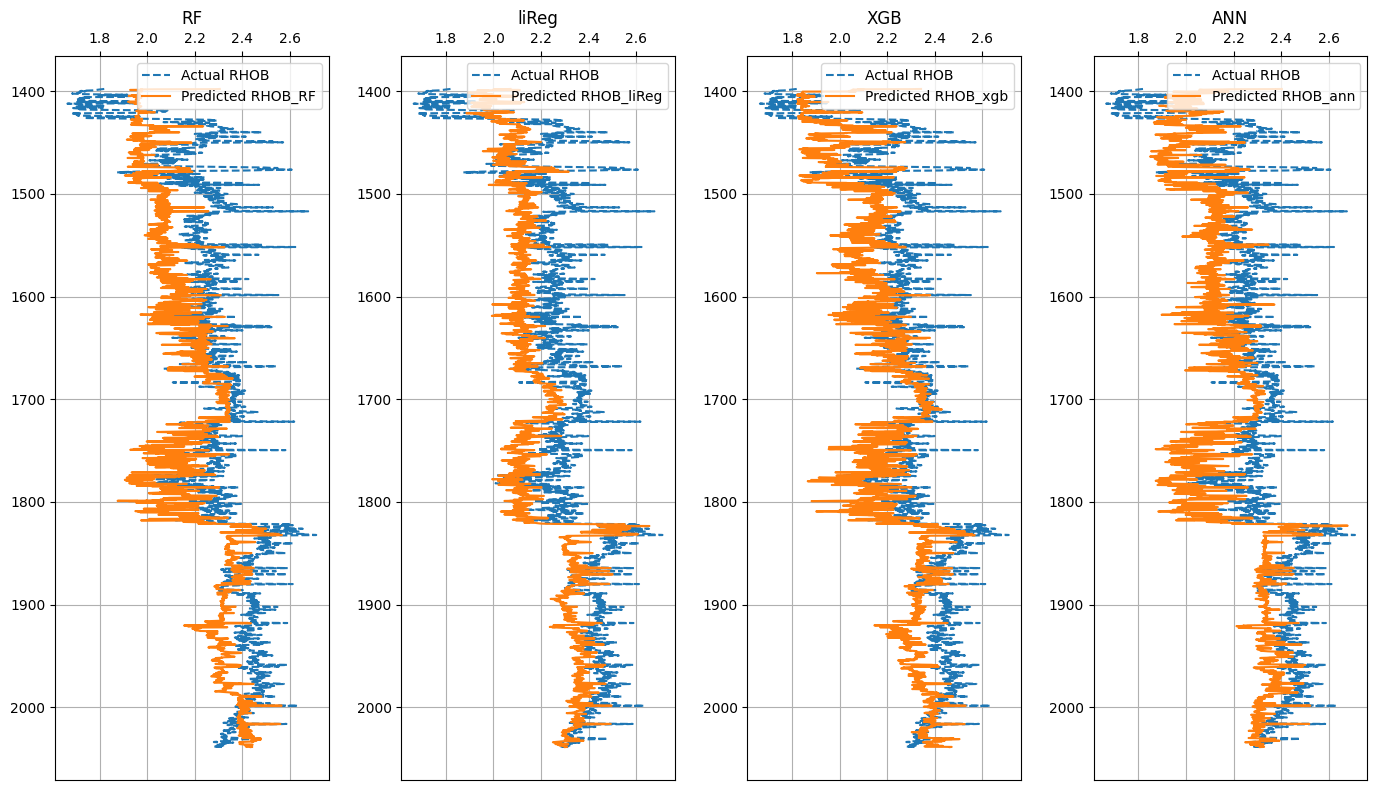

In [20]:
#random forest
test_3['Predicted_RHOB_RF'] = reg.predict(test_3_noTarget)

#extreme gradient booster 
test_3['Predicted_RHOB_xgb'] = xgb_model.predict(test_3_noTarget)

#ANN
test_3['Predicted_RHOB_ANN'] = model.predict(scaler.transform(test_3_noTarget))

#linear Regression
test_3['Predicted_RHOB_liReg'] = linearReg_model.predict(test_3_noTarget)

#creating a figure with three subplots
fig, (tst31, tst32, tst33, tst34) = plt.subplots(1, 4, figsize =(14, 8))

#random forest
tst31.plot(test_3['RHOB'],test_3['DEPTH'],'--', label = 'Actual RHOB')
tst31.plot(test_3['Predicted_RHOB_RF'], test_3_noTarget['DEPTH'], label = 'Predicted RHOB_RF')
tst31.grid(True)
tst31.legend()
tst31.xaxis.set_ticks_position('top')
tst31.xaxis.set_label_position('top')
tst31.invert_yaxis()
tst31.set_title('RF')

#linear regression
tst32.plot(test_3['RHOB'],test_3['DEPTH'],'--', label = 'Actual RHOB')
tst32.plot(test_3['Predicted_RHOB_liReg'], test_3_noTarget['DEPTH'], label = 'Predicted RHOB_liReg')
tst32.grid(True)
tst32.legend()
tst32.xaxis.set_ticks_position('top')
tst32.xaxis.set_label_position('top')
tst32.invert_yaxis()
tst32.set_title('liReg')

#extreme gradient booster 
tst33.plot(test_3['RHOB'],test_3['DEPTH'],'--', label = 'Actual RHOB')
tst33.plot(test_3['Predicted_RHOB_xgb'], test_3_noTarget['DEPTH'], label = 'Predicted RHOB_xgb')
tst33.grid(True)
tst33.legend()
tst33.xaxis.set_ticks_position('top')
tst33.xaxis.set_label_position('top')
tst33.invert_yaxis()
tst33.set_title('XGB')

#ANN
tst34.plot(test_3['RHOB'],test_3['DEPTH'],'--', label = 'Actual RHOB')
tst34.plot(test_3['Predicted_RHOB_ANN'], test_3_noTarget['DEPTH'], label = 'Predicted RHOB_ann')
tst34.grid(True)
tst34.legend()
tst34.xaxis.set_ticks_position('top')
tst34.xaxis.set_label_position('top')
tst34.invert_yaxis()
tst34.set_title('ANN')

#display the figure
plt.tight_layout()
plt.show()

In [21]:
#root mean sq. error
lhs = test_3['RHOB']

#rf
rf_rhs = test_3['Predicted_RHOB_RF']

rf_r2 =r2_score(lhs, rf_rhs)
rf_mse=mean_squared_error(lhs, rf_rhs)
rf_rmse = np.sqrt(rf_mse)

#liReg
liReg_rhs = test_3['Predicted_RHOB_liReg']

liReg_r2 =r2_score(lhs, liReg_rhs)
liReg_mse=mean_squared_error(lhs, liReg_rhs)
liReg_rmse = np.sqrt(liReg_mse)

#ANN
ann_rhs = test_3['Predicted_RHOB_ANN']

ann_r2 =r2_score(lhs, ann_rhs)
ann_mse=mean_squared_error(lhs, ann_rhs)
ann_rmse = np.sqrt(ann_mse)

#xgb
xgb_rhs = test_3['Predicted_RHOB_xgb']

xgb_r2 =r2_score(lhs, xgb_rhs)
xgb_mse=mean_squared_error(lhs, xgb_rhs)
xgb_rmse = np.sqrt(xgb_mse)

In [22]:
test_3_data = {
    'Mean Square Error': [rf_mse, xgb_mse, ann_mse, liReg_mse],
    'Root Mean Square Error': [rf_rmse, xgb_rmse, ann_rmse, liReg_rmse],
    'R square Error': [rf_r2, xgb_r2, ann_r2, liReg_r2]
}
test_3_error = pd.DataFrame(test_3_data, index = ['Random Forest Regressor',
                                    'Extreme Gradient Booster',
                                    'Artificial Neural Network',
                                    'linear Regression'])
test_3_error

,Mean Square Error,Root Mean Square Error,R square Error
Random Forest Regressor,0.024894,0.157778,0.044618
Extreme Gradient Booster,0.020463,0.143048,0.214673
Artificial Neural Network,0.027697,0.166425,-0.062973
linear Regression,0.019842,0.140860,0.238514


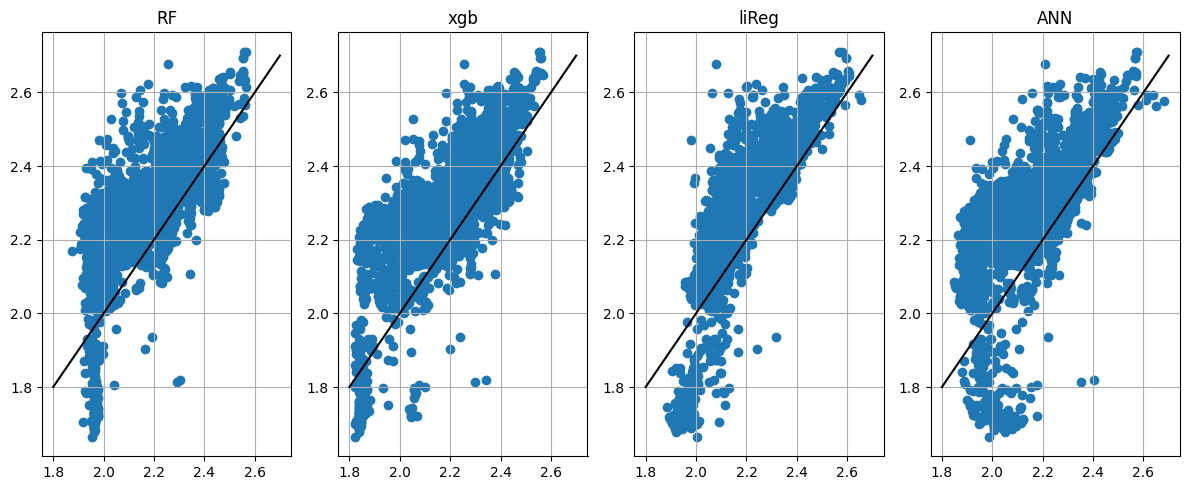

In [23]:
fig, (err1, err2, err3, err4) = plt.subplots(1, 4, figsize = (12, 5))

#first plot
err1.scatter(rf_rhs, lhs)
err1.plot((1.8, 2.7), (1.8, 2.7), 'black')
err1.grid(True)
err1.set_title('RF')

#2nd plot
err2.scatter(xgb_rhs, lhs)
err2.grid(True)
err2.plot((1.8, 2.7), (1.8, 2.7), 'black')
err2.set_title('xgb')

#3rd plot
err3.scatter(liReg_rhs, lhs)
err3.grid(True)
err3.plot((1.8, 2.7), (1.8, 2.7), 'black')
err3.set_title('liReg')

#4th plot
err4.scatter(ann_rhs, lhs)
err4.grid(True)
err4.plot((1.8, 2.7), (1.8, 2.7), 'black')
err4.set_title('ANN')

#display the figure
plt.tight_layout()
plt.show()


# END OF CODE